In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import os
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors
from scipy import stats
%matplotlib inline

In [ ]:
def assign_congestion(arr , meanval , stdval):
  output = []
  for ele in arr:
    if ele > meanval:
      output.append(0)
    elif ele>meanval - stdval and ele<=meanval:
      output.append(1)
    else:
      output.append(2)
  return output

**Concatinating different files**

**BoxCox**
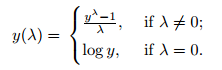

In [ ]:
root_dir = '/content/drive/MyDrive/Trafficflow data'
df1 = pd.DataFrame()
congestion = []
for (root, dirs , files) in tqdm(os.walk(root_dir)):
  print(root, dirs, files)
  for file in files:
    df2  = pd.read_excel(os.path.join(root, file))
    speed = []
    for index , row in df2.iterrows():
      speed.append((row['distance(meters)'])/((row['duration_min(minutes)']+row['duration_max(minutes)']) * 30.0))
    df2['Speed(m/s)'] = speed
    skew = df2['Speed(m/s)'].skew()
    print('Skew : {}'.format(skew))
    if skew>0.5 :
      cbrt = stats.boxcox(df2['Speed(m/s)'])[0]
      print('After + transforrm skew : {}'.format(pd.Series(cbrt).skew()))
      me =  np.mean(cbrt)
      std = np.std(cbrt)
      df2['Congestion'] = assign_congestion(cbrt , me , std)  
    elif skew<-0.5:
      cbrt = df2['Speed(m/s)'].apply(lambda x : np.sqrt(x))
      print('After - transform skew : {}'.format(cbrt.skew()))
      me =  np.mean(cbrt)
      std = np.std(cbrt)
      df2['Congestion'] = assign_congestion(cbrt , me , std)  
    else:
      me =  np.mean(df2['Speed(m/s)'])
      std = np.std(df2['Speed(m/s)'])
      df2['Congestion'] = assign_congestion(df2['Speed(m/s)'] , me , std)

    df1 = pd.concat([df1 , df2])


0it [00:00, ?it/s]

/content/drive/MyDrive/Trafficflow data ['Rajeev', 'Vedant', 'Nishant', 'Gaurav'] []
/content/drive/MyDrive/Trafficflow data/Rajeev [] ['4.xlsx', '3.xlsx', '2.xlsx', '1.xlsx', '8.xlsx', '9.xlsx', '5.xlsx', '7.xlsx', '6.xlsx']
Skew : 0.47790229928566313
Skew : 1.1212207481315144
After + transforrm skew : 0.073641722467493
Skew : -0.21714417509782774
Skew : 1.080138616929716
After + transforrm skew : -0.06953255073762084
Skew : 0.9188619621087927
After + transforrm skew : 0.03624749769445332
Skew : 0.18714973235291427
Skew : 1.1062727838730315
After + transforrm skew : 0.16270276431601172
Skew : 0.3432928698568448


2it [00:08,  4.31s/it]

Skew : 0.4976365423185508
/content/drive/MyDrive/Trafficflow data/Vedant [] ['24.xlsx', '18.xlsx', '19.xlsx', '21.xlsx', '22.xlsx', '23.xlsx', '25.xlsx', '26.xlsx', '20.xlsx']
Skew : 0.6089293660436496
After + transforrm skew : 0.03988746424596886
Skew : 0.4910665031998798
Skew : 0.4131664085963987
Skew : -0.6275991370483578
After - transform skew : -0.7359471845909423
Skew : -0.49702929450637806
Skew : -0.20518066662221687
Skew : 0
Skew : 1.183181518501633
After + transforrm skew : -0.0990487088750396


3it [00:16,  5.60s/it]

Skew : 0.15701236669182117
/content/drive/MyDrive/Trafficflow data/Nishant [] ['27.xlsx', '28.xlsx', '29.xlsx', '30.xlsx', '31.xlsx', '32.xlsx', '33.xlsx', '34.xlsx']
Skew : 0.6904982019452843
After + transforrm skew : 0.07162283832546507
Skew : 0.7901247731518032
After + transforrm skew : 0.16724439847655898
Skew : 0.7686403742073188
After + transforrm skew : 0.12301183359014489
Skew : 0.6081334645180491
After + transforrm skew : 0.03376021349871453
Skew : 1.0726848515247667
After + transforrm skew : 0.16704493142511612
Skew : 0.5289342465384573
After + transforrm skew : 0.0020121522774670386
Skew : 0.9265801679939488
After + transforrm skew : -0.003554225173884906


4it [00:22,  6.05s/it]

Skew : 0.6349476738200538
After + transforrm skew : 0.044303043719161515
/content/drive/MyDrive/Trafficflow data/Gaurav [] ['10.xlsx', '11.xlsx', '12.xlsx', '13.xlsx', '14.xlsx', '15.xlsx', '16.xlsx', '17.xlsx']
Skew : 0.6937875499097685
After + transforrm skew : -0.003663845227518459
Skew : 0.5875963567229677
After + transforrm skew : 0.1419617732343865
Skew : 0.35801473041465026
Skew : 0.5389079389462762
After + transforrm skew : 0.0018982619426865905
Skew : 0.6845235559578564
After + transforrm skew : 0.013545235574539743
Skew : 2.2787215757514625
After + transforrm skew : -0.5362647426394566
Skew : 1.1474993239767135
After + transforrm skew : 0.16671683294675366


5it [00:29,  5.89s/it]

Skew : 0.5267434021003141
After + transforrm skew : 0.011661204015193586


In [ ]:
root_dir = '/content/drive/MyDrive/Trafficflow data'
df1 = pd.DataFrame()
congestion = []
for (root, dirs , files) in tqdm(os.walk(root_dir)):
  print(root, dirs, files)
  for file in files:
    if file[-3:] == 'csv':
      continue
    df2  = pd.read_excel(os.path.join(root, file))
    print(file)
    print(df2.columns)

0it [00:00, ?it/s]

/content/drive/MyDrive/Trafficflow data ['Rajeev', 'Vedant', 'Nishant', 'Gaurav'] ['dataset.csv']
/content/drive/MyDrive/Trafficflow data/Rajeev [] ['4.xlsx', '3.xlsx', '2.xlsx', '1.xlsx', '8.xlsx', '9.xlsx', '5.xlsx', '7.xlsx', '6.xlsx']
4.xlsx
Index(['road', 'distance(meters)', 'distance_label', 'duration(minutes)',
       'duration_min(minutes)', 'duration_max(minutes)', 'origin_coordinates',
       'road_distance_timing(meters:seconds)', 'origin', 'destination',
       'destination_coordinates', 'query_origin', 'query_destination',
       'timestamp', 'datetime_utc', 'Intersections', 'Public Places', 'Ways'],
      dtype='object')
3.xlsx
Index(['road', 'distance(meters)', 'distance_label', 'duration(minutes)',
       'duration_min(minutes)', 'duration_max(minutes)', 'origin_coordinates',
       'road_distance_timing(meters:seconds)', 'origin', 'destination',
       'destination_coordinates', 'query_origin', 'query_destination',
       'timestamp', 'datetime_utc', 'Intersections', '

2it [00:01,  1.17it/s]

6.xlsx
Index(['road', 'distance(meters)', 'distance_label', 'duration(minutes)',
       'duration_min(minutes)', 'duration_max(minutes)', 'origin_coordinates',
       'road_distance_timing(meters:seconds)', 'origin', 'destination',
       'destination_coordinates', 'query_origin', 'query_destination',
       'timestamp', 'datetime_utc', 'Intersections', 'Public Places', 'Ways'],
      dtype='object')
/content/drive/MyDrive/Trafficflow data/Vedant [] ['24.xlsx', '18.xlsx', '19.xlsx', '21.xlsx', '22.xlsx', '23.xlsx', '25.xlsx', '26.xlsx', '20.xlsx']
24.xlsx
Index(['road', 'distance(meters)', 'distance_label', 'duration(minutes)',
       'duration_min(minutes)', 'duration_max(minutes)', 'origin_coordinates',
       'road_distance_timing(meters:seconds)', 'origin', 'destination',
       'destination_coordinates', 'query_origin', 'query_destination',
       'timestamp', 'datetime_utc', 'Intersections', 'Public Places', 'Ways'],
      dtype='object')
18.xlsx
Index(['road', 'distance(meters)'

3it [00:03,  1.04s/it]

20.xlsx
Index(['road', 'distance(meters)', 'distance_label', 'duration(minutes)',
       'duration_min(minutes)', 'duration_max(minutes)', 'origin_coordinates',
       'road_distance_timing(meters:seconds)', 'origin', 'destination',
       'destination_coordinates', 'query_origin', 'query_destination',
       'timestamp', 'datetime_utc', 'Intersections', 'Public Places', 'Ways'],
      dtype='object')
/content/drive/MyDrive/Trafficflow data/Nishant [] ['27.xlsx', '28.xlsx', '29.xlsx', '30.xlsx', '31.xlsx', '32.xlsx', '33.xlsx', '34.xlsx']
27.xlsx
Index(['road', 'distance(meters)', 'distance_label', 'duration(minutes)',
       'duration_min(minutes)', 'duration_max(minutes)', 'origin_coordinates',
       'road_distance_timing(meters:seconds)', 'origin', 'destination',
       'destination_coordinates', 'query_origin', 'query_destination',
       'timestamp', 'datetime_utc', 'Intersections', 'Ways', 'Public Places'],
      dtype='object')
28.xlsx
Index(['road', 'distance(meters)', 'distan

4it [00:04,  1.05s/it]

34.xlsx
Index(['road', 'distance(meters)', 'distance_label', 'duration(minutes)',
       'duration_min(minutes)', 'duration_max(minutes)', 'origin_coordinates',
       'road_distance_timing(meters:seconds)', 'origin', 'destination',
       'destination_coordinates', 'query_origin', 'query_destination',
       'timestamp', 'datetime_utc', 'Intersections', 'Ways', 'Public Places'],
      dtype='object')
/content/drive/MyDrive/Trafficflow data/Gaurav [] ['10.xlsx', '17.xlsx', '11.xlsx', '12.xlsx', '13.xlsx', '14.xlsx', '15.xlsx', '16.xlsx']
10.xlsx
Index(['road', 'distance(meters)', 'distance_label', 'duration(minutes)',
       'duration_min(minutes)', 'duration_max(minutes)', 'origin_coordinates',
       'road_distance_timing(meters:seconds)', 'origin', 'destination',
       'destination_coordinates', 'query_origin', 'query_destination',
       'timestamp', 'datetime_utc', 'Intersections', 'Ways', 'Public Places'],
      dtype='object')
17.xlsx
Index(['road', 'distance(meters)', 'distanc

5it [00:04,  1.03it/s]

16.xlsx
Index(['road', 'distance(meters)', 'distance_label', 'duration(minutes)',
       'duration_min(minutes)', 'duration_max(minutes)', 'origin_coordinates',
       'road_distance_timing(meters:seconds)', 'origin', 'destination',
       'destination_coordinates', 'query_origin', 'query_destination',
       'timestamp', 'datetime_utc', 'Intersections', 'Ways', 'Public Places'],
      dtype='object')


In [ ]:
df1['Congestion'].value_counts()

0    8941
1    7994
2    3585
Name: Congestion, dtype: int64

In [ ]:
df1.head()

,road,distance(meters),distance_label,duration(minutes),duration_min(minutes),duration_max(minutes),origin_coordinates,road_distance_timing(meters:seconds),origin,destination,destination_coordinates,query_origin,query_destination,timestamp,datetime_utc,Intersections,Public Places,Ways,Speed(m/s),Congestion
0,GD Ambekar Marg/Katrak Rd,831,850 m,4,2,5,"19.005832899999998, 72.846137","{0: 0, 169: 38, 241: 52, 371: 80, 563: 116, 63...","19.005832926471925, 72.84613696781575","19.01261988327652, 72.84924044245552","19.0126199, 72.8492404","19.005832926471925, 72.84613696781575","19.01261988327652, 72.84924044245552",1625077800,06/30/2021 18:30:00,2,5,2,3.957143,1
1,GD Ambekar Marg/Katrak Rd,831,850 m,3,2,5,"19.005832899999998, 72.846137","{0: 0, 169: 38, 241: 53, 371: 79, 634: 126, 74...","19.005832926471925, 72.84613696781575","19.01261988327652, 72.84924044245552","19.0126199, 72.8492404","19.005832926471925, 72.84613696781575","19.01261988327652, 72.84924044245552",1625081400,06/30/2021 19:30:00,2,5,2,3.957143,1
2,GD Ambekar Marg/Katrak Rd,831,850 m,3,2,5,"19.005832899999998, 72.846137","{0: 0, 169: 35, 241: 51, 563: 112, 634: 124, 7...","19.005832926471925, 72.84613696781575","19.01261988327652, 72.84924044245552","19.0126199, 72.8492404","19.005832926471925, 72.84613696781575","19.01261988327652, 72.84924044245552",1625085000,06/30/2021 20:30:00,2,5,2,3.957143,1
3,GD Ambekar Marg/Katrak Rd,831,850 m,3,2,4,"19.005832899999998, 72.846137","{0: 0, 169: 32, 371: 68, 563: 99, 634: 110, 74...","19.005832926471925, 72.84613696781575","19.01261988327652, 72.84924044245552","19.0126199, 72.8492404","19.005832926471925, 72.84613696781575","19.01261988327652, 72.84924044245552",1625088600,06/30/2021 21:30:00,2,5,2,4.616667,0
4,GD Ambekar Marg/Katrak Rd,831,850 m,3,2,4,"19.005832899999998, 72.846137","{0: 0, 169: 33, 241: 47, 371: 69, 563: 99, 576...","19.005832926471925, 72.84613696781575","19.01261988327652, 72.84924044245552","19.0126199, 72.8492404","19.005832926471925, 72.84613696781575","19.01261988327652, 72.84924044245552",1625092200,06/30/2021 22:30:00,2,5,2,4.616667,0


In [ ]:
df1.to_csv(os.path.join(root_dir , 'dataset.csv'))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


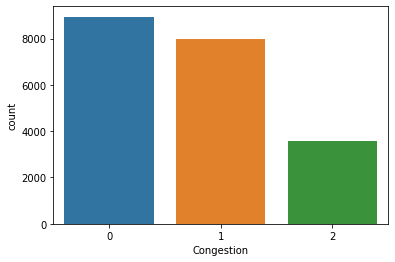

In [ ]:
sns.countplot('Congestion' , data = df1)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Trafficflow data/dataset.csv' , index_col = 0)
df.head()

,road,distance(meters),distance_label,duration(minutes),duration_min(minutes),duration_max(minutes),origin_coordinates,road_distance_timing(meters:seconds),origin,destination,destination_coordinates,query_origin,query_destination,timestamp,datetime_utc,Intersections,Public Places,Ways,Speed(m/s),Congestion,Unnamed: 15,intersection,ways,public places
0,GD Ambekar Marg/Katrak Rd,831,850 m,4,2,5,"19.005832899999998, 72.846137","{0: 0, 169: 38, 241: 52, 371: 80, 563: 116, 63...","19.005832926471925, 72.84613696781575","19.01261988327652, 72.84924044245552","19.0126199, 72.8492404","19.005832926471925, 72.84613696781575","19.01261988327652, 72.84924044245552",1625077800,06/30/2021 18:30:00,2.0,5.0,2.0,39.571429,0,NaN,NaN,NaN,NaN
1,GD Ambekar Marg/Katrak Rd,831,850 m,3,2,5,"19.005832899999998, 72.846137","{0: 0, 169: 38, 241: 53, 371: 79, 634: 126, 74...","19.005832926471925, 72.84613696781575","19.01261988327652, 72.84924044245552","19.0126199, 72.8492404","19.005832926471925, 72.84613696781575","19.01261988327652, 72.84924044245552",1625081400,06/30/2021 19:30:00,2.0,5.0,2.0,39.571429,0,NaN,NaN,NaN,NaN
2,GD Ambekar Marg/Katrak Rd,831,850 m,3,2,5,"19.005832899999998, 72.846137","{0: 0, 169: 35, 241: 51, 563: 112, 634: 124, 7...","19.005832926471925, 72.84613696781575","19.01261988327652, 72.84924044245552","19.0126199, 72.8492404","19.005832926471925, 72.84613696781575","19.01261988327652, 72.84924044245552",1625085000,06/30/2021 20:30:00,2.0,5.0,2.0,39.571429,0,NaN,NaN,NaN,NaN
3,GD Ambekar Marg/Katrak Rd,831,850 m,3,2,4,"19.005832899999998, 72.846137","{0: 0, 169: 32, 371: 68, 563: 99, 634: 110, 74...","19.005832926471925, 72.84613696781575","19.01261988327652, 72.84924044245552","19.0126199, 72.8492404","19.005832926471925, 72.84613696781575","19.01261988327652, 72.84924044245552",1625088600,06/30/2021 21:30:00,2.0,5.0,2.0,46.166667,0,NaN,NaN,NaN,NaN
4,GD Ambekar Marg/Katrak Rd,831,850 m,3,2,4,"19.005832899999998, 72.846137","{0: 0, 169: 33, 241: 47, 371: 69, 563: 99, 576...","19.005832926471925, 72.84613696781575","19.01261988327652, 72.84924044245552","19.0126199, 72.8492404","19.005832926471925, 72.84613696781575","19.01261988327652, 72.84924044245552",1625092200,06/30/2021 22:30:00,2.0,5.0,2.0,46.166667,0,NaN,NaN,NaN,NaN


In [ ]:
df.shape

(20520, 24)

**Creating Class**

In [ ]:
speed = []
for index , row in df.iterrows():
  speed.append((row['distance(meters)'])/(((row['duration_min(minutes)']+row['duration_max(minutes)'])/20.0) * 60))

In [ ]:
df['Speed(m/s)'] = speed
df.head()

,road,distance(meters),distance_label,duration(minutes),duration_min(minutes),duration_max(minutes),origin_coordinates,road_distance_timing(meters:seconds),origin,destination,destination_coordinates,query_origin,query_destination,timestamp,datetime_utc,Speed(m/s)
0,Dadar TT Flyover/Eastern Express Hwy,636,650 m,1,1,2,"19.0178069, 72.847815","{0: 0, 197: 15, 319: 24, 435: 33, 635: 51}","19.017806883251282, 72.84781502259689","19.013083705180144, 72.84442583119865","19.0130837, 72.8444258","19.017806883251282, 72.84781502259689","19.013083705180144, 72.84442583119865",1625077800,06/30/2021 18:30:00,70.666667
1,Dadar TT Flyover/Eastern Express Hwy,636,650 m,1,1,2,"19.0178069, 72.847815","{0: 0, 197: 15, 319: 25, 435: 35, 635: 53}","19.017806883251282, 72.84781502259689","19.013083705180144, 72.84442583119865","19.0130837, 72.8444258","19.017806883251282, 72.84781502259689","19.013083705180144, 72.84442583119865",1625081400,06/30/2021 19:30:00,70.666667
2,Dadar TT Flyover/Eastern Express Hwy,636,650 m,1,1,2,"19.0178069, 72.847815","{0: 0, 197: 16, 319: 26, 435: 36, 635: 55}","19.017806883251282, 72.84781502259689","19.013083705180144, 72.84442583119865","19.0130837, 72.8444258","19.017806883251282, 72.84781502259689","19.013083705180144, 72.84442583119865",1625085000,06/30/2021 20:30:00,70.666667
3,Dadar TT Flyover/Eastern Express Hwy,636,650 m,1,1,2,"19.0178069, 72.847815","{0: 0, 197: 15, 319: 25, 435: 34, 635: 52}","19.017806883251282, 72.84781502259689","19.013083705180144, 72.84442583119865","19.0130837, 72.8444258","19.017806883251282, 72.84781502259689","19.013083705180144, 72.84442583119865",1625088600,06/30/2021 21:30:00,70.666667
4,Dadar TT Flyover/Eastern Express Hwy,636,650 m,1,1,1,"19.0178069, 72.847815","{0: 0, 197: 13, 319: 22, 435: 30, 635: 47}","19.017806883251282, 72.84781502259689","19.013083705180144, 72.84442583119865","19.0130837, 72.8444258","19.017806883251282, 72.84781502259689","19.013083705180144, 72.84442583119865",1625092200,06/30/2021 22:30:00,106.000000


In [ ]:
max(df['Speed(m/s)'
])

106.0

In [ ]:
print('Average Speed : {}'.format(np.mean(df['Speed(m/s)'])))
print('Standard Deviation : {}'.format(np.std(df['Speed(m/s)'])))

Average Speed : 47.48415388795548
Standard Deviation : 13.658529270173803


In [ ]:
df['Speed(m/s)'].skew()

0.948302919169418

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


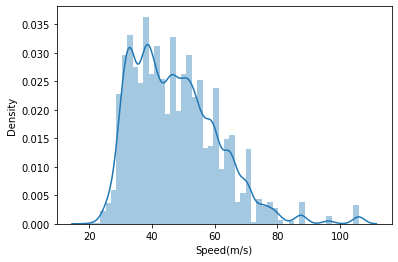

In [ ]:
sns.distplot(df['Speed(m/s)'])

In [ ]:
df['Speed(m/s)sqrt'] = df['Speed(m/s)'].apply(lambda x : x**0.5)
df['Speed(m/s)sqrt'].skew()

0.5436940241628778

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


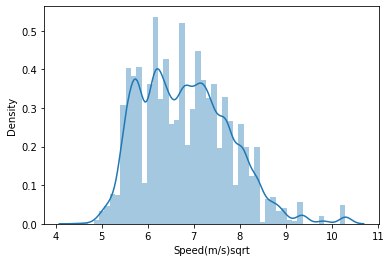

In [ ]:
sns.distplot(df['Speed(m/s)sqrt'])

In [ ]:
df['Speed(m/s)cbrt'] = df['Speed(m/s)'].apply(lambda x : x**(1/3))
df['Speed(m/s)cbrt'].skew()

0.42407196305982026

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


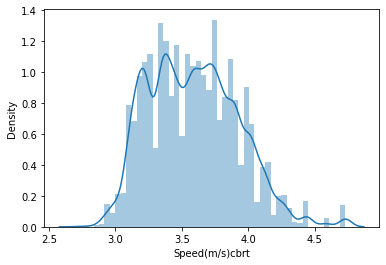

In [ ]:
sns.distplot(df['Speed(m/s)cbrt'])

In [ ]:
print('Average Speed of sqrt transformed : {}'.format(np.mean(df['Speed(m/s)sqrt'])))
print('Standard Deviation transformed : {}'.format(np.std(df['Speed(m/s)sqrt'])))
print('Max of transformer : {}'.format(np.max(df['Speed(m/s)sqrt'])))
print('Min of transformer : {}'.format(np.min(df['Speed(m/s)sqrt'])))

Average Speed of sqrt transformed : 6.823697545159074
Standard Deviation transformed : 0.9598467065888484
Max of transformer : 10.295630140987
Min of transformer : 4.476274906329708


In [ ]:
print('Average Speed of cbrt transformed : {}'.format(np.mean(df['Speed(m/s)cbrt'])))
print('Standard Deviation transformed : {}'.format(np.std(df['Speed(m/s)cbrt'])))
print('Max of transformer : {}'.format(np.max(df['Speed(m/s)cbrt'])))
print('Min of transformer : {}'.format(np.min(df['Speed(m/s)cbrt'])))

Average Speed of cbrt transformed : 3.589849017379561
Standard Deviation transformed : 0.3346135294927189
Max of transformer : 4.732623491163368
Min of transformer : 2.716092149787421


In [ ]:
maximum = np.max(df['Speed(m/s)sqrt'])
minimum = np.min(df['Speed(m/s)sqrt'])
mean    = np.mean(df['Speed(m/s)sqrt'])
std     = np.std(df['Speed(m/s)sqrt'])
print('Speed range for Congestion 0 : {} - {}'.format(maximum-2*std , maximum))
print('Speed range for Congestion 1 : {} - {}'.format(mean , maximum - 2*std))
print('Speed range for Congestion 2 : {} - {}'.format(mean - 2* std , mean))
print('Speed range for congestion 3 : {} - {}'.format(minimum , mean-2*std))

Speed range for Congestion 0 : 8.375936727809304 - 10.295630140987
Speed range for Congestion 1 : 6.823697545159074 - 8.375936727809304
Speed range for Congestion 2 : 4.9040041319813765 - 6.823697545159074
Speed range for congestion 3 : 4.476274906329708 - 4.9040041319813765


In [ ]:
maximum = np.max(df['Speed(m/s)cbrt'])
minimum = np.min(df['Speed(m/s)cbrt'])
mean    = np.mean(df['Speed(m/s)cbrt'])
std     = np.std(df['Speed(m/s)cbrt'])
print('Speed range for Congestion 0 : {} - {}'.format(maximum-2*std , maximum))
print('Speed range for Congestion 1 : {} - {}'.format(mean , maximum - 2*std))
print('Speed range for Congestion 2 : {} - {}'.format(mean - 2* std , mean))
print('Speed range for congestion 3 : {} - {}'.format(minimum , mean-2*std))

Speed range for Congestion 0 : 4.06339643217793 - 4.732623491163368
Speed range for Congestion 1 : 3.589849017379561 - 4.06339643217793
Speed range for Congestion 2 : 2.9206219583941233 - 3.589849017379561
Speed range for congestion 3 : 2.716092149787421 - 2.9206219583941233


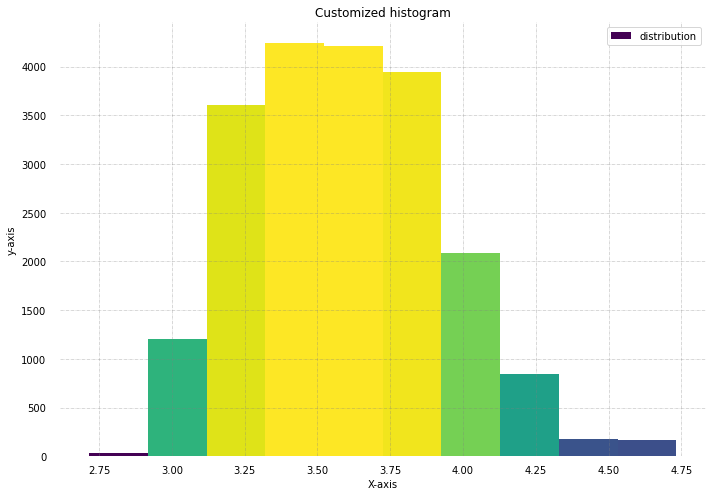

In [ ]:
legend = ['distribution']
 
# Creating histogram
fig, axs = plt.subplots(1, 1,
                        figsize =(10, 7),
                        tight_layout = True)
 
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    axs.spines[s].set_visible(False)
 
# Remove x, y ticks
axs.xaxis.set_ticks_position('none')
axs.yaxis.set_ticks_position('none')
   
# Add padding between axes and labels
axs.xaxis.set_tick_params(pad = 5)
axs.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
axs.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.6)
 
# Add Text watermark
# fig.text(0.9, 0.15, 'Jeeteshgavande30',
#          fontsize = 12,
#          color ='red',
#          ha ='right',
#          va ='bottom',
#          alpha = 0.7)
 
# Creating histogram
N, bins, patches = axs.hist(df['Speed(m/s)cbrt'])
 
# Setting color
fracs = ((N**(1 / 5)) / N.max())
norm = colors.Normalize(fracs.min(), fracs.max())
 
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)
 
# Adding extra features   
plt.xlabel("X-axis")
plt.ylabel("y-axis")
plt.legend(legend)
plt.title('Customized histogram')
 
# Show plot
plt.show()